In [33]:
#importing all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load the Dataset**

In [34]:
athletes_events = pd.read_csv("/content/athlete_events.csv")
noc_region=pd.read_csv("/content/noc_regions.csv")

**Display the Dataset**

In [35]:
athletes_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


**Join both dataframes**

In [37]:
olympic_data=athletes_events.merge(noc_region, how='left', on='NOC')

In [38]:
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [39]:
olympic_data.shape


(271116, 17)

In [40]:
#renaming some of the column names
olympic_data.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [41]:
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


**Printing column information**

In [42]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


**Getting Statistical information of numerical data using .describe()**

In [43]:
olympic_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


**Checking for null values**

In [44]:
olympic_data.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

**Printing number null values present**

In [45]:
olympic_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [46]:
#Printing the list of columns having null values
olympic_null_data_list=olympic_data.columns[olympic_data.isnull().any()].tolist()
print(olympic_null_data_list)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


**Indian athletes details**

In [47]:
olympic_data.query('Team=="India"').head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN


**Top 10 participating Countries**

In [48]:
top_10=olympic_data.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

**Visualization for top_10 countries**

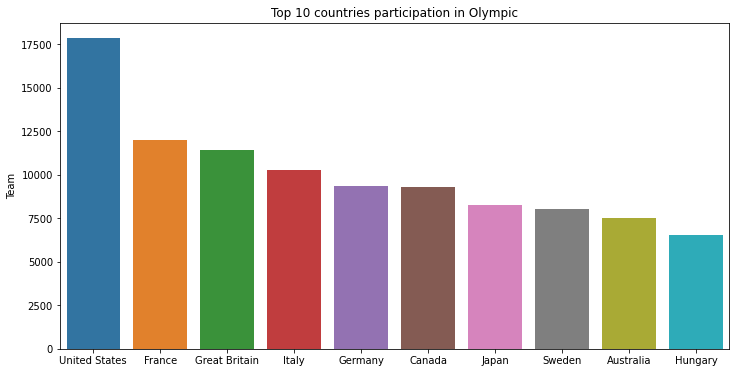

In [49]:
plt.figure(figsize=(12,6))
plt.title('Top 10 countries participation in Olympic')
sns.barplot(x=top_10.index, y=top_10)

**Age graph of Participants**

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.8400e+02]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58]),
 <a list of 24 Patch objects>)

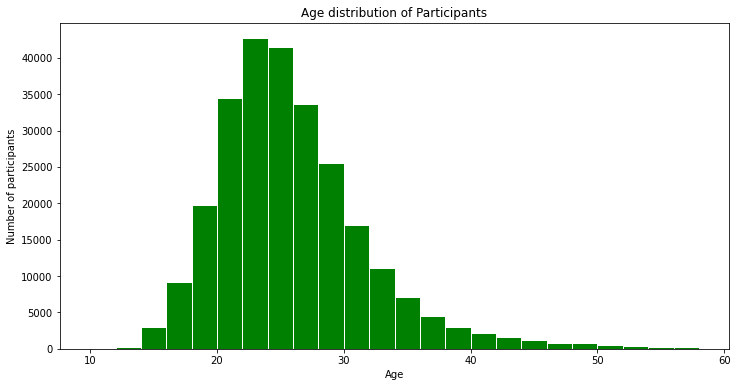

In [53]:
plt.figure(figsize=(12, 6))
plt.title("Age distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(olympic_data.Age, bins= np.arange(10, 60, 2), color="green", edgecolor="white")

**Summer and winter olympic games**

In [59]:
summer_games = olympic_data[olympic_data.Season == 'Summer'].Sport.unique()
summer_games

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [60]:
winter_games = olympic_data[olympic_data.Season == 'Winter'].Sport.unique()
winter_games

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

**Male and Female Participants**

In [61]:
gender_count = olympic_data.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

**Plot for Male and Female participation**

([<matplotlib.patches.Wedge at 0x7faa639082d0>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

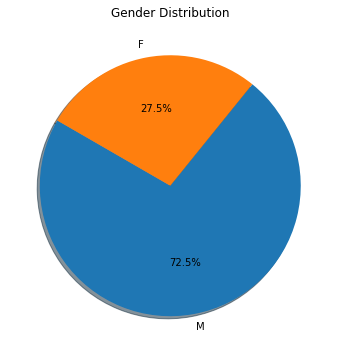

In [66]:
plt.figure(figsize=(12, 6))
plt.title("Gender Distribution")
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=150, shadow=True)

**Total Medals Count**

In [75]:
Medals = olympic_data.Medal.value_counts()
Medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

**Total number Female Participation in each Olympics**

In [101]:
female = olympic_data[(olympic_data.Sex=='F') & (olympic_data.Season=='Summer')][['Sex', 'Year']]
female = female.groupby('Year').count().reset_index()
female.head(5)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [102]:
female.tail(5)

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


**Women Participation plot**

In [103]:
femaleOlympics = olympic_data[(olympic_data.Sex=='F') & (olympic_data.Season=='Summer')]

Text(0.5, 1.0, 'Female Participation')

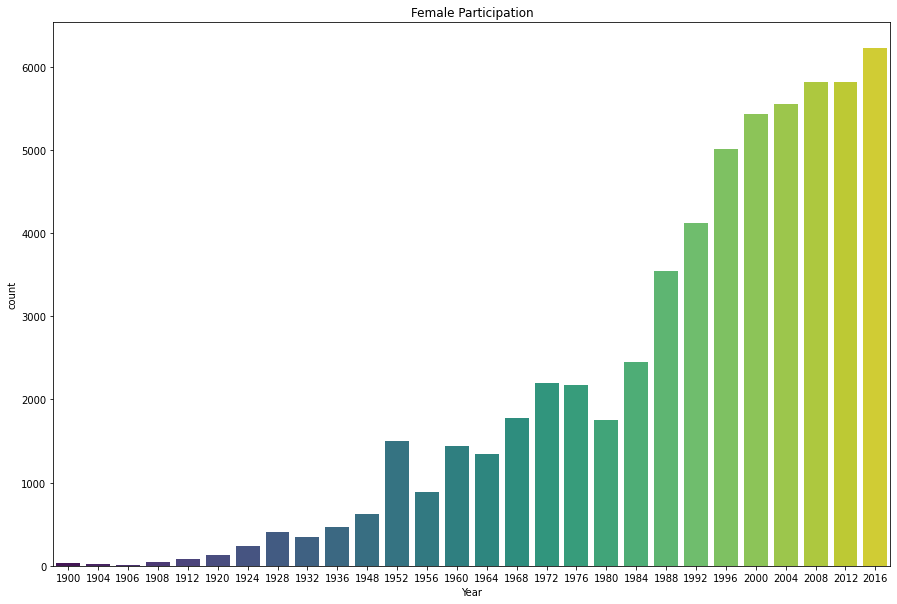

In [189]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=femaleOlympics, palette="viridis")
plt.title("Female Participation")

**Total medals count**

In [172]:
medals = olympic_data[(olympic_data['Medal'].notnull()) & (olympic_data['Medal'].notnull()) & (olympic_data['Medal'].notnull())]
medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


In [177]:
print("Total number of medals won:", medals['Medal'].count())

Total number of medals won: 39783


**Athletes who won gold medal**

In [113]:
goldMedals = olympic_data[(olympic_data.Medal == 'Gold')]
goldMedals.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NaN
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,Norway,NaN


In [180]:
print("Total number gold medals won:", goldMedals['Medal'].count())

Total number gold medals won: 13224


**Sport events won gold medal**

In [132]:
sport_events = goldMedals['Sport']
sport_events

3            Tug-Of-War
42           Gymnastics
44           Gymnastics
48           Gymnastics
60        Alpine Skiing
              ...      
270981             Judo
271009           Hockey
271016       Volleyball
271049           Rowing
271076        Athletics
Name: Sport, Length: 13224, dtype: object

**Female gold medal count**

In [162]:
sport_events_female = goldMedals['Sport'][goldMedals['Sex']=='F']
sport_events_female


79                   Handball
283                      Golf
1494                   Boxing
1495                   Boxing
1527                Athletics
                 ...         
270588               Handball
270934    Rhythmic Gymnastics
270970              Athletics
271009                 Hockey
271076              Athletics
Name: Sport, Length: 3744, dtype: object

In [182]:
print("Total number of Gold medals won by female:", sport_events_female.count())

Total number of Gold medals won by female: 3744


**Male gold medal count**

In [163]:
sport_events_male = goldMedals['Sport'][goldMedals['Sex']=='M']
sport_events_male

3            Tug-Of-War
42           Gymnastics
44           Gymnastics
48           Gymnastics
60        Alpine Skiing
              ...      
270896           Diving
270917       Gymnastics
270981             Judo
271016       Volleyball
271049           Rowing
Name: Sport, Length: 9480, dtype: object

In [183]:
print("Total number of Gold medals won by male:", sport_events_male.count())

Total number of Gold medals won by male: 9480


**gold Medal count of athletes at the age of 60**

In [185]:
sport_events_age60 = goldMedals['Sport'][goldMedals['Age']>=60]
sport_events_age60 

104003    Art Competitions
105199               Roque
159298            Shooting
190952             Archery
226374             Archery
233386            Shooting
233387            Shooting
233390            Shooting
261102             Archery
261675    Art Competitions
Name: Sport, dtype: object

In [187]:
print("Total number of Gold medals won by athletes at the age of 60 and above:", sport_events_age60.count())

Total number of Gold medals won by athletes at the age of 60 and above: 10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals Distribution')

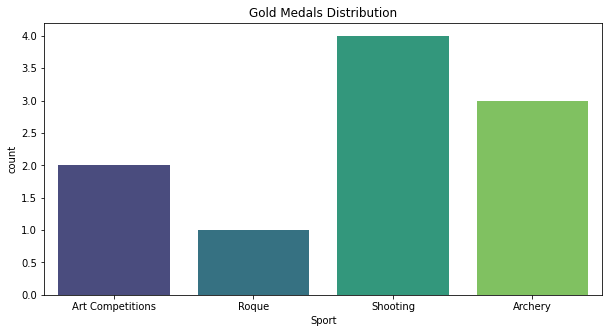

In [188]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sport_events_age60, palette='viridis')
plt.title("Gold Medals Distribution")

**Gold Medals won from each country**

In [159]:
totalGold=goldMedals.Region.value_counts().reset_index(name="Medal").head(6)
totalGold

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491


**Plot for top countries won gold**

Text(0.5, 1.0, 'Top 10 Countries who won Gold')

<Figure size 1440x1080 with 0 Axes>

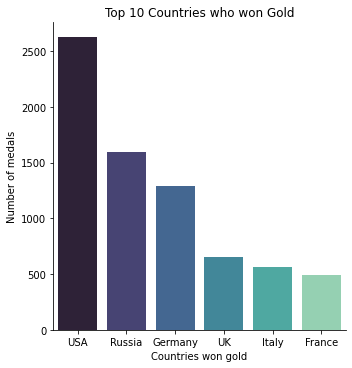

In [160]:
plt.figure(figsize=(20, 15))
g = sns.catplot(x='index', y='Medal', data=totalGold, kind='bar', palette='mako')
g.set_xlabels("Countries won gold")
g.set_ylabels("Number of medals")
plt.title("Top 10 Countries who won Gold")
